Data Pre-Processing & eksplorasi data

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings

warnings.filterwarnings('ignore')

DATA PREPROCESSING

In [ ]:
#Create Files_Name
image_data='/content/drive/MyDrive/defungi'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,H2
1,H6
2,H5
3,H1
4,H3


In [ ]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/defungi/H6/H6_3a_3.jpg,H6
1,/content/drive/MyDrive/defungi/H1/H1_98b_5.jpg,H1
2,/content/drive/MyDrive/defungi/H3/H3_13a_41.jpg,H3
3,/content/drive/MyDrive/defungi/H6/H6_10a_1.jpg,H6
4,/content/drive/MyDrive/defungi/H5/H5_132b_4.jpg,H5
...,...,...
3607,/content/drive/MyDrive/defungi/H1/H1_90b_7.jpg,H1
3608,/content/drive/MyDrive/defungi/H1/H1_85b_20.jpg,H1
3609,/content/drive/MyDrive/defungi/H1/H1_86d_4.jpg,H1
3610,/content/drive/MyDrive/defungi/H5/H5_110a_2.jpg,H5


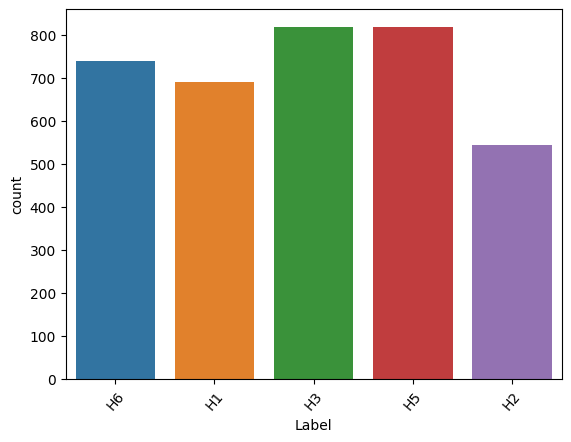

In [ ]:
#VISUALISASI DATA
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

**Membagi Data Train & Data Test**

In [ ]:
# Memisahkan fitur dan label
X = dataframe['Image']  # Fitur
y = dataframe['Label']  # Label

# Membagi data menjadi data training (80%) dan data test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data pada masing-masing set
print("Jumlah data training:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data training: 2889
Jumlah data test: 723


**Pembangunan Model Baseline**

In [ ]:
from skimage.feature import hog
from skimage import io, color, exposure
import os

def resize_image(img_path, new_size=(100, 100)):
    image = cv2.imread(img_path)
    resized_img = cv2.resize(image, new_size)
    return resized_img

def extract_features(img_path):
    image = io.imread(img_path)
    gray_image = color.rgb2gray(image)
    hog_features = hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
    return hog_features

def preprocess_image(img_path):
    # Resize gambar ke ukuran tertentu
    resized_img = resize_image(img_path, new_size=(100, 100))
    # Ekstraksi fitur menggunakan HOG
    hog_features = extract_features(resized_img)
    return hog_features


In [ ]:
X_train_features = [extract_features(img_path) for img_path in X_train]
print("Jumlah fitur Train yang diekstraksi:", len(X_train_features))
# Ekstraksi fitur secara paralel untuk data test
X_test_features = [extract_features(img_path) for img_path in X_test]
print("Jumlah fitur Test yang diekstraksi:", len(X_test_features))

Jumlah fitur Train yang diekstraksi: 2889
Jumlah fitur Test yang diekstraksi: 723


In [ ]:
# Inisialisasi dan melatih model RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
random_forest.fit(X_train_features, y_train)

# Membuat prediksi pada data test
predictions = random_forest.predict(X_test_features)

**EVALUASI MODEL**

In [ ]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.4281609195402299

Confusion Matrix:
 [[99  0  8 20  4]
 [10  0 37 32  7]
 [35  0 73 33  9]
 [20  0 42 86 19]
 [ 8  0 56 58 40]]

Classification Report:
               precision    recall  f1-score   support

          H1       0.58      0.76      0.65       131
          H2       0.00      0.00      0.00        86
          H3       0.34      0.49      0.40       150
          H5       0.38      0.51      0.43       167
          H6       0.51      0.25      0.33       162

    accuracy                           0.43       696
   macro avg       0.36      0.40      0.36       696
weighted avg       0.39      0.43      0.39       696

